In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Algerian_forest_clean_dataset.csv")

In [3]:
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,region.1
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0,0


In [4]:
df.drop(["index",	"day",	"month",	"year"],inplace=True,axis=1);

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,region.1
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0,0


In [6]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

#### divide to Independent and dependent features 

In [7]:
X = df.drop('FWI',axis=1)
Y = df['FWI']

In [8]:
df.drop('FWI',axis=1,inplace=True)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [10]:
x_train.shape

(182, 12)

In [11]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region,region.1
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837,0.188837


<Axes: >

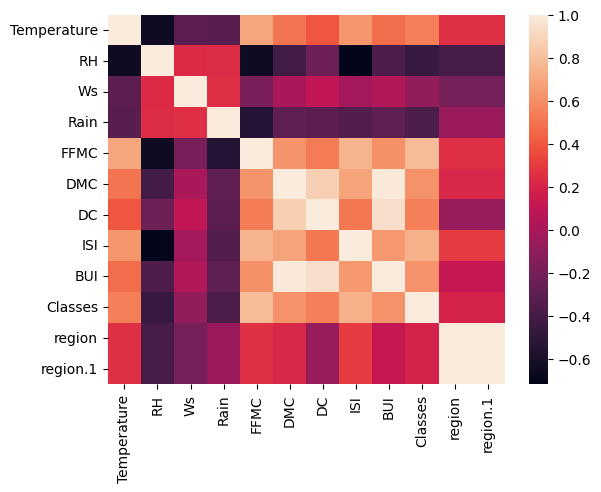

In [12]:
sns.heatmap(x_train.corr())

In [13]:
def remove_corr(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(dataset.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i,j])>threshold):
                colname =corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [14]:
data = remove_corr(df,0.90)

In [15]:
data

{'BUI', 'region.1'}

In [16]:
x_test.drop(data,axis=1,inplace=True)

In [17]:
x_train.drop(remove_corr(x_train,0.98),axis=1,inplace=True)

In [18]:
remove_corr(x_test,0.98)

set()

In [19]:
x_test.drop(data,axis=1,inplace=True)

KeyError: "['BUI', 'region.1'] not found in axis"

In [ ]:
x_test
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes,region
97,29,74,19,0.1,75.8,3.6,32.2,2.1,0,0.0
141,31,72,14,0.2,60.2,3.8,8.0,0.8,0,1.0
192,40,31,15,0.0,94.2,22.5,46.3,16.6,1,1.0
68,32,60,18,0.3,77.1,11.3,47.0,2.2,0,0.0
119,32,47,14,0.7,77.5,7.1,8.8,1.8,0,0.0
...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,0,0.0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,0,0.0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,0,0.0
179,34,59,16,0.0,88.1,19.5,47.2,7.4,1,1.0


#### standardizing the values

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler();

In [23]:
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

In [24]:
x_train

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 10))

In [ ]:
#### boxplot to understand outlier

<Axes: >

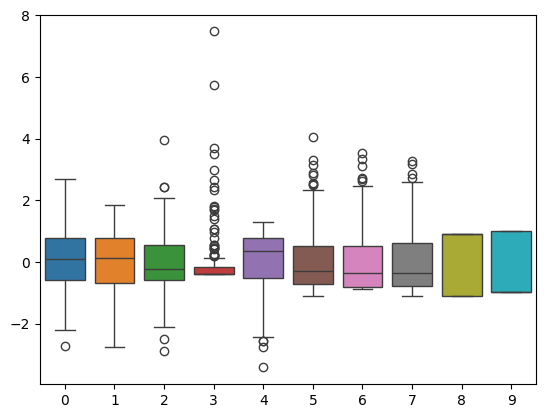

In [25]:
sns.boxplot(x_train)

<Axes: >

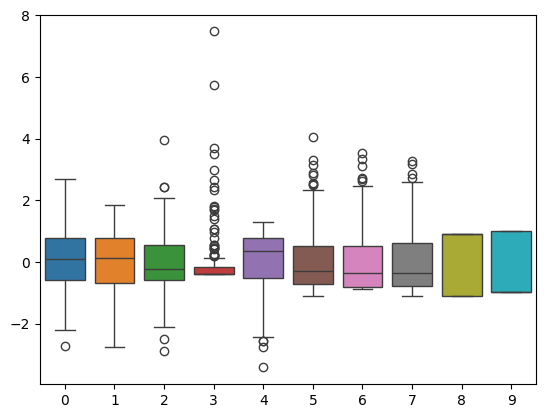

In [26]:
sns.boxplot(x_train)

In [27]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [32]:
from sklearn.metrics import mean_absolute_error,r2_score
mae = mean_absolute_error(y_test,linreg.predict(x_test))

In [30]:
mae

0.5170107980662406

In [35]:
r2_score(y_pred=linreg.predict(x_test),y_true=y_test)

0.9830565611009445

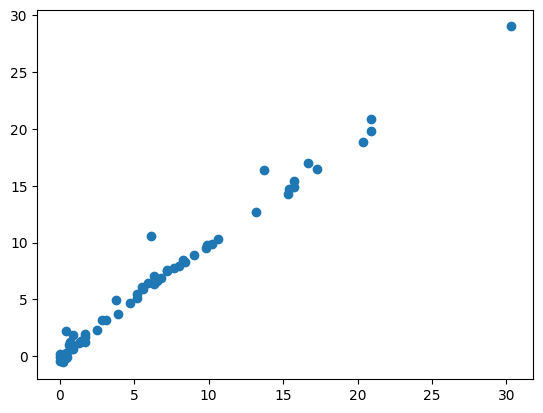

In [36]:
plt.scatter(y_test,linreg.predict(x_test))